
Make sure to change the last line above to the folder path where you store your notebooks, mba263.py, and data.

In [1]:
import mba263
import pandas

In [2]:
data = pandas.read_csv('data/BBB.csv')
data

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,purch,child,youth,cook,do_it,refernce,art,geog,buyer
0,10001,M,NY,10605,106,49,29,109,248,357,10,3,2,2,0,1,0,2,no
1,10002,M,NY,10960,109,39,27,35,103,138,3,0,1,0,1,0,0,1,no
2,10003,F,PA,19146,191,19,15,25,147,172,2,0,0,2,0,0,0,0,no
3,10004,F,NJ,7016,70,7,7,15,257,272,1,0,0,0,0,1,0,0,no
4,10005,F,NY,10804,108,15,15,15,134,149,1,0,0,1,0,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59996,F,NY,11967,119,9,9,15,12,27,1,1,0,0,0,0,0,0,no
49996,59997,F,NJ,8882,88,25,5,79,294,373,7,3,0,1,1,0,1,1,no
49997,59998,M,NJ,7410,74,3,3,15,178,193,1,0,0,0,0,1,0,0,no
49998,59999,M,NJ,7090,70,49,29,98,246,344,8,2,0,1,0,2,1,2,no


Does the premise of RFM hold for BookBinders?

In [3]:
data[ ['last','purch','total_','buyer'] ].groupby('buyer').mean() #r, f, m
# check if these variables differ
# those who bought purchased more recently, bought more often, and bought more $
# difference in average between response and non-response groups
# however, may be tightly correlated

,last,purch,total_
buyer,,,
no,12.730683,3.758081,205.734751
yes,8.611676,5.219151,234.301415


What can we conclude?

Next question: Do R, F and M all capture the same underlying behavioral characteristic?<br>
Check the correlation across variables

In [4]:
rho, p = mba263.pwcorr(data[ ['last','purch','total_'] ])

In [5]:
rho

,last,purch,total_
last,1.000000,0.006009,-0.001915
purch,0.006009,1.000000,0.515287
total_,-0.001915,0.515287,1.000000


In [6]:
p

,last,purch,total_
last,0.000000,0.179085,0.668458
purch,0.179085,0.000000,0.000000
total_,0.668458,0.000000,0.000000


What does this say and mean?

<b>Start of RFM Analysis</b><br>Begin by forming recency decile:

In [7]:
# n tile takes two arguments: data, n = num groups to be split into

In [8]:
result = mba263.ntile(data['last'],10)

<code>ntile</code> generates a column of numbers indicating the quantile of the row in the original data. It takes two arguments: (i) the name of the row to slice, (ii) number of n-tiles. <br>Example output:

In [9]:
result

array([9, 9, 6, ..., 0, 9, 0])

Now glue the n-tile column into the original dataset. 

In [10]:
data['rec_dec']=result

Decile statistics

In [11]:
mba263.tabulate(data['rec_dec'])

,Name,Count,Frequency
4,0,7508,0.15016
5,1,3664,0.07328
2,2,10074,0.20148
6,4,6158,0.12316
7,5,6229,0.12458
1,6,6184,0.12368
8,7,1082,0.02164
3,8,4264,0.08528
0,9,4837,0.09674


Not equallize sized! What's happening is that n-tile never separates data that have an identical value
i.e. ```last == 1``` grouped in one group

Statistics about the grouping variable

In [12]:
data[ ['last','rec_dec'] ].groupby('rec_dec').describe()

last                                                   
           count       mean       std   min   25%   50%   75%   max
rec_dec                                                            
0         7508.0   2.001598  1.000065   1.0   1.0   3.0   3.0   3.0
1         3664.0   5.000000  0.000000   5.0   5.0   5.0   5.0   5.0
2        10074.0   8.241612  0.970421   7.0   7.0   9.0   9.0   9.0
4         6158.0  11.000000  0.000000  11.0  11.0  11.0  11.0  11.0
5         6229.0  13.000000  0.000000  13.0  13.0  13.0  13.0  13.0
6         6184.0  15.000000  0.000000  15.0  15.0  15.0  15.0  15.0
7         1082.0  17.000000  0.000000  17.0  17.0  17.0  17.0  17.0
8         4264.0  22.037054  2.202623  19.0  21.0  23.0  23.0  25.0
9         4837.0  30.535249  2.631301  27.0  29.0  31.0  33.0  35.0

certain groups have only one value for recency!

Create a dummy for buying in the test mailing. Do this for HW too.

In [13]:
data['buy_dummy']=pandas.get_dummies(data['buyer'])['yes']
data[['buy_dummy']]

,buy_dummy
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


Plot probability of buying (mean of the dummy variable) by recency decile.

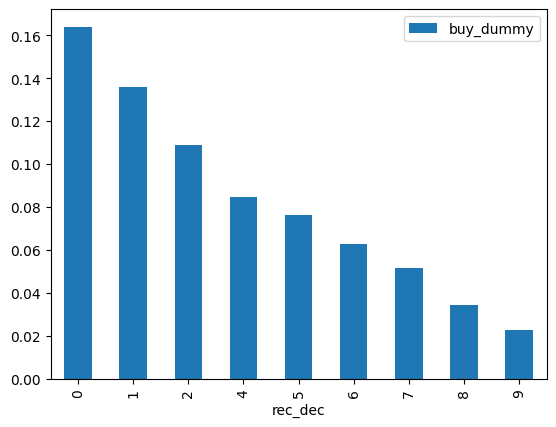

In [14]:
data[ ['buy_dummy','rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar');

strong monotonic relationship: those who buy recently likely to buy more
missing a decile: decile 3, this can happen, it's fine
someone is recent, last will have a low value

Repeat for frequency

In [15]:
data['freq_dec'] = mba263.ntile(data['purch'],10)

In [16]:
data[ ['purch','freq_dec'] ].groupby('freq_dec').describe()

purch                                                   
            count       mean       std   min   25%   50%   75%   max
freq_dec                                                            
0         15120.0   1.000000  0.000000   1.0   1.0   1.0   1.0   1.0
3         14935.0   2.000000  0.000000   2.0   2.0   2.0   2.0   2.0
6          6000.0   3.999833  0.820333   3.0   3.0   4.0   5.0   5.0
7          4042.0   6.509154  0.499978   6.0   6.0   7.0   7.0   7.0
8          5868.0   9.002215  0.817710   8.0   8.0   9.0  10.0  10.0
9          4035.0  11.496159  0.500047  11.0  11.0  11.0  12.0  12.0

<AxesSubplot:xlabel='freq_dec'>

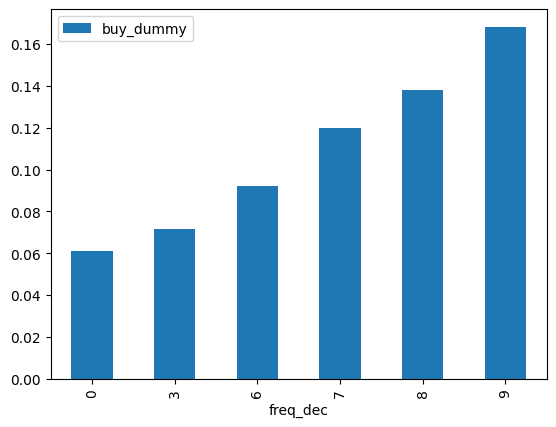

In [17]:
data[ ['buy_dummy','freq_dec'] ].groupby('freq_dec').mean().plot(kind='bar')

Reverse the ranking

high freq, high decile, bought a lot


In [18]:
data['freq_dec']=9 - data['freq_dec']

flip deciles

<AxesSubplot:xlabel='freq_dec'>

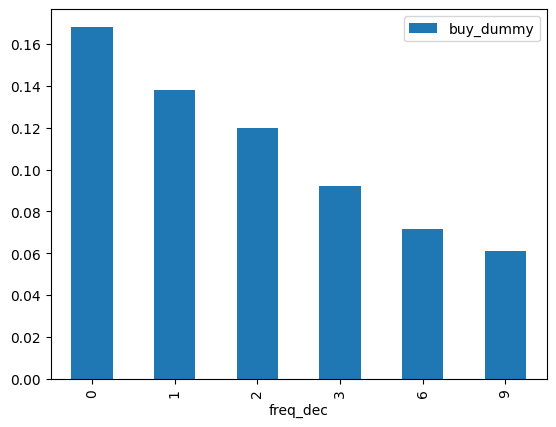

In [19]:
data[ ['buy_dummy','freq_dec'] ].groupby('freq_dec').mean().plot(kind='bar')

In [20]:
data['mv_dec'] = mba263.ntile(data['total_'],10)

In [21]:
data['mv_dec']= 9 - data['mv_dec']

In [22]:
data[ ['total_','mv_dec'] ].groupby('mv_dec').describe()

total_                                                           
         count        mean        std    min    25%    50%     75%    max
mv_dec                                                                   
0       4928.0  388.023539  35.105163  339.0  358.0  382.0  413.00  479.0
1       5034.0  315.309297  10.985779  299.0  306.0  314.0  324.00  338.0
2       5017.0  283.708591   8.617167  269.0  276.0  284.0  291.00  298.0
3       4902.0  254.045288   8.417536  240.0  247.0  254.0  261.00  268.0
4       4996.0  224.718175   8.720613  210.0  217.0  225.0  232.00  239.0
5       5095.0  193.944848   8.881583  179.0  186.0  194.0  201.50  209.0
6       4972.0  162.508246   9.232275  147.0  154.0  163.0  170.25  178.0
7       4994.0  128.817381  10.314729  111.0  120.0  129.0  138.00  146.0
8       4980.0   90.759839  11.499127   71.0   81.0   91.0  101.00  110.0
9       5082.0   45.974616  15.172496   15.0   34.0   47.0   59.00   70.0

In [23]:
data

,acctnum,gender,state,zip,zip3,first,last,book_,nonbook_,total_,...,cook,do_it,refernce,art,geog,buyer,rec_dec,buy_dummy,freq_dec,mv_dec
0,10001,M,NY,10605,106,49,29,109,248,357,...,2,0,1,0,2,no,9,0,1,0
1,10002,M,NY,10960,109,39,27,35,103,138,...,0,1,0,0,1,no,9,0,3,7
2,10003,F,PA,19146,191,19,15,25,147,172,...,2,0,0,0,0,no,6,0,6,6
3,10004,F,NJ,7016,70,7,7,15,257,272,...,0,0,1,0,0,no,2,0,9,2
4,10005,F,NY,10804,108,15,15,15,134,149,...,1,0,0,0,0,no,6,0,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59996,F,NY,11967,119,9,9,15,12,27,...,0,0,0,0,0,no,2,0,9,9
49996,59997,F,NJ,8882,88,25,5,79,294,373,...,1,1,0,1,1,no,1,0,2,0
49997,59998,M,NJ,7410,74,3,3,15,178,193,...,0,0,1,0,0,no,0,0,9,5
49998,59999,M,NJ,7090,70,49,29,98,246,344,...,1,0,2,1,2,no,9,0,1,0


top group has a lot of spending, kind of flattens out though and not as predictive over time

<AxesSubplot:xlabel='mv_dec'>

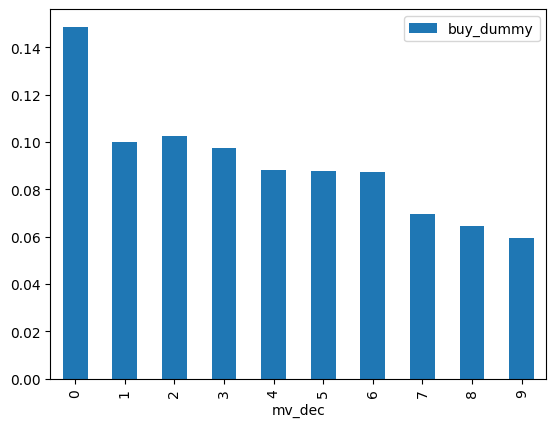

In [24]:
data[ ['buy_dummy','mv_dec'] ].groupby('mv_dec').mean().plot(kind='bar')

In [46]:
data[['buyer', 'buy_dummy']]

,buyer,buy_dummy
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
49995,no,0
49996,no,0
49997,no,0
49998,no,0


5 groups for each variable, if you do 10, too many

<AxesSubplot:xlabel='rfmindex_iq'>

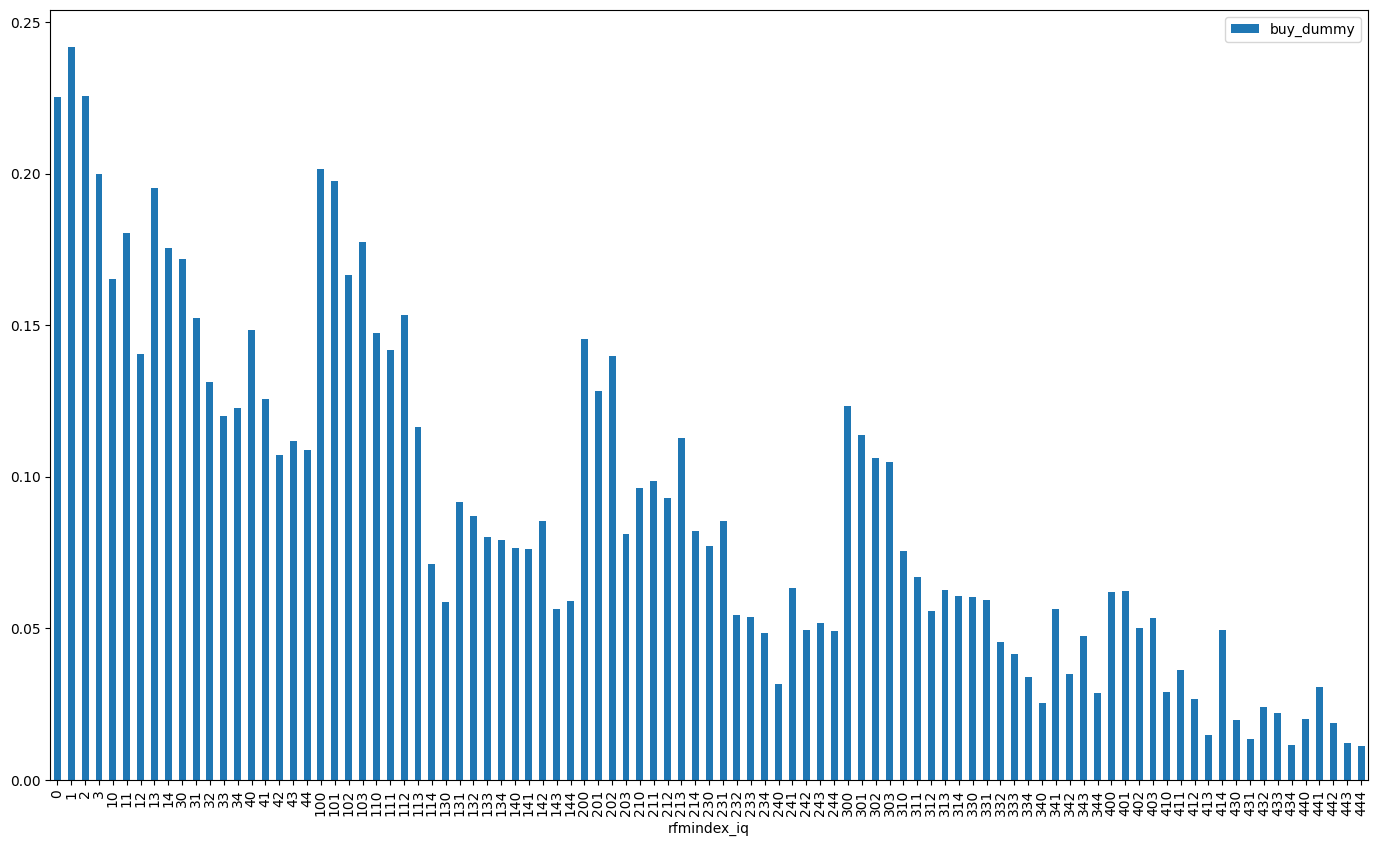

In [25]:
data['rec_q'] = mba263.ntile(data['last'],5)
data['freq_q'] = mba263.ntile(data['purch'],5)
data['mv_q'] = mba263.ntile(data['total_'],5)
data['freq_q'] = 4 - data['freq_q'] #reordering
data['mv_q'] = 4 - data['mv_q'] #reordering
data['rfmindex_iq'] = 100 * data['rec_q'] + 10 * data['freq_q'] + data['mv_q'] #rfm index, assembles 3 digit code
data[ ['buy_dummy','rfmindex_iq'] ].groupby('rfmindex_iq').mean().plot(kind='bar',figsize=[17, 10])

a lot of variation of response rate via quintiles

Assign every customer a response from their RFM cell.

In [26]:
data['responserate_iq']=mba263.get_means(data['buy_dummy'],data['rfmindex_iq'])

In [45]:
data[['responserate_iq']]

,responserate_iq
0,0.061937
1,0.014815
2,0.041420
3,0.076220
4,0.047431
...,...
49995,0.059190
49996,0.165455
49997,0.107303
49998,0.061937


Choose customers to mail to -- create mailto dummy

In [27]:
data['mailto_iq']=(data['responserate_iq']>0.083)*1

Pick a mailing subset

In [28]:
datamailing = data[data['mailto_iq']==1]

Size of the mailing sample

In [29]:
len(datamailing)

23268

Response rate in the mailing sample

In [30]:
mba263.tabulate(datamailing['buyer'])

,Name,Count,Frequency
0,no,19998,0.859464
1,yes,3270,0.140536


### revenue = count == yes * book margin - (len(datamailing) * cost of mailing)

response rate here is 14%, goes up by 15% vs random sample

Response rate in a full sample.

In [31]:
len(data)

50000

In [32]:
mba263.tabulate(data['buyer'])

,Name,Count,Frequency
0,no,45478,0.90956
1,yes,4522,0.09044


Sequential n-tiles

usually preferred, grouping people in sequential way, less variability

In [33]:
data['rfmindex_sq']=mba263.rfm_sq(data[ ['last','purch','total_'] ],5)

In [34]:
data['responserate_sq']=mba263.get_means(data['buy_dummy'],data['rfmindex_sq'])

In [35]:
datamailing_sq = data[data['responserate_sq']>0.083]

In [36]:
len(datamailing_sq)

23703

In [37]:
mba263.tabulate(datamailing_sq['buyer'])

,Name,Count,Frequency
0,no,20391,0.860271
1,yes,3312,0.139729


In [38]:
data['rfm_dec']=mba263.ntile(data['responserate_iq'],10)

In [39]:
data['rfm_dec']=9-data['rfm_dec']

In [40]:
data[['rfm_dec','buy_dummy']].groupby('rfm_dec').sum().cumsum()/data[['rfm_dec','buy_dummy']].groupby('rfm_dec').count().cumsum()

,buy_dummy
rfm_dec,
0,0.209434
1,0.181252
2,0.162817
3,0.150100
4,0.137614
5,0.125251
6,0.115343
7,0.107157
8,0.099200


In [41]:
data[['rfm_dec','buy_dummy']].groupby('rfm_dec').sum().cumsum()

,buy_dummy
rfm_dec,
0,999.0
1,1775.0
2,2432.0
3,2940.0
4,3367.0
5,3745.0
6,4031.0
7,4276.0
8,4437.0


smaller # in top deciles, but higher response rate

In [42]:
round(0.2094/0.0944*100)

222

In [43]:
data['rfmindex_iq']

0        400
1        413
2        333
3        141
4        343
        ... 
49995    144
49996     10
49997     42
49998    400
49999     12
Name: rfmindex_iq, Length: 50000, dtype: int64

rfm index in hw